Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [50]:
using Causality

In [2]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 30
ρ = 2/N
Λ = sprand(N, N, ρ, n->fill(true, n)) |> x->tril(x,-1) |> x->x+x'

30×30 SparseMatrixCSC{Int64, Int64} with 72 stored entries:
⠀⠀⠄⠃⠠⠀⠄⠀⡀⠀⠀⢁⠀⠀⠄
⠤⠁⠀⠀⠀⠀⢀⠈⠈⠀⠁⠈⠐⠂⠀
⠀⠂⠀⠀⠀⠀⠀⠂⠀⠀⣀⠀⠀⠢⠀
⠀⠁⡀⠐⠠⠀⠀⡠⠀⠀⡀⠈⠀⠀⢠
⠀⠈⠂⠀⠀⠀⠀⠀⡠⠊⠀⠒⢀⡀⠁
⠄⢀⡁⠀⠀⠘⡀⠈⢠⠀⢀⠐⠐⠀⠠
⠀⠀⠰⠀⠠⡀⠀⠀⠀⠰⠐⠀⠀⠀⠀
⠀⠁⠀⠀⠀⠀⠀⠒⠁⠀⠀⠂⠀⠀⠀

In [3]:
λ = 0.3
getpar(p,a1,b1,c1,a2,b2,c2) = [fill(p, 1, N);
     fill(a1, 1, N); fill(b1, 1, N); fill(c1, 1, N);
     fill(a2,   1, N); fill(b2, 1, N); fill(c2, 1, N)]

getpar (generic function with 1 method)

In [32]:
ε = 1e-10

θp = getpar(1/N, ε, T/2, 1/ε,   λ, T/2, 1/ε)
Mp = StochasticModel(T, θp, Λ, GaussianRate, GaussianRate);


sample! = Sampler(Mp)
xtrue = zeros(N)
sample!(xtrue)
sum(xtrue .< T)

22

In [33]:
ε = 1e-3
θp2 = getpar(1/N, ε, T/2, 1/ε,   λ, T/2, 1/ε)
Mp2 = StochasticModel(T, θp2, Λ, GaussianRate, GaussianRate);

In [34]:
θ = copy(θp2)
θmin = getpar(ε  , ε  ,  -T,   ε,   ε,  -T, ε  )
θmax = getpar(1-ε, 1/ε,  2T, 1/ε, 1/ε,  2T, 1/ε)
M = StochasticModel(T, θ, Λ, GaussianRate, GaussianRate);

In [35]:
nobs, p = 5, 1e-5
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 11.468565538469555, 1.0e-5)
 (2, 0, 10.201909394706544, 1.0e-5)
 (3, 1, 18.681813899657715, 1.0e-5)
 (4, 1, 11.107268386818097, 1.0e-5)
 (5, 1, 14.889663173609133, 1.0e-5)

In [38]:
descend!(Mp, O; M=M, numsamples=200, numiters=1000, 
         θmin=θmin, θmax=θmax, descender=SignDescender(1e-2));

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/ab/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
  F:  7.937120223749078


In [39]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [40]:
stats = post(Mp, O)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


30×10000 Matrix{Float64}:
 19.7965   19.3062    13.4793   11.4879   …  20.0       15.3807   13.4917
 20.0      20.0       20.0      14.5403      20.0       19.0126   16.3156
 14.0693    6.71832    1.86638   5.48981      8.21738    6.97125   4.48212
 10.2043    0.84184    3.3658    8.90644      9.50938    5.2614    6.83582
  9.04927   3.26699    1.19598   3.02674      5.12986    7.51693   8.1645
  4.37577   0.147416   6.2035    4.42443  …   0.767072   7.82673  10.5668
 20.0      20.0       18.5686   14.4873      20.0       17.0541   14.3623
 20.0      20.0       20.0      20.0         20.0       20.0      20.0
 20.0      20.0       20.0      20.0         20.0       20.0      20.0
 16.0208    7.74742    3.84281   7.404        3.14595    5.26009   8.91416
 20.0       4.04723   20.0      20.0      …  20.0       20.0      20.0
 10.2127   10.467      5.55937   3.13703      8.12845    8.81611  12.4837
 10.7365    6.06458    3.20923   2.61451     10.3617     8.50672   5.47388
  ⋮              

In [47]:
causample! = Sampler(M)
statscau = prior(causample!)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


30×100000 Matrix{Float64}:
 13.4052     13.3195     16.1294   …  20.0       15.6615   14.501
 18.952      19.8767     20.0         20.0       20.0      20.0
  4.16324     2.68586     1.938        6.41402    5.11895   1.29166
  1.57355     1.69087     0.0          2.10889    2.22864   4.25643
  5.82978     2.48128     0.0          4.392      2.32793   3.64575
  0.691495    1.88871     4.45576  …   5.48923    8.97342   0.0
 17.0251     18.6403     19.8992      20.0       16.5796   20.0
 20.0        20.0        20.0         20.0       20.0      20.0
 20.0         0.0        20.0         20.0       20.0      20.0
  3.73358     1.58944     3.67893      7.37359    9.27772   0.474796
 20.0        20.0        20.0      …  20.0       20.0      20.0
  0.773635    1.82703     3.96266      6.4979     2.50324   9.64991
  4.9029      3.48274     1.98267      3.75872    4.29661   1.65655
  ⋮                                ⋱                       
 14.4522      2.19866     8.43469      3.92487    6.11

In [48]:
O

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 11.468565538469555, 1.0e-5)
 (2, 0, 10.201909394706544, 1.0e-5)
 (3, 1, 18.681813899657715, 1.0e-5)
 (4, 1, 11.107268386818097, 1.0e-5)
 (5, 1, 14.889663173609133, 1.0e-5)

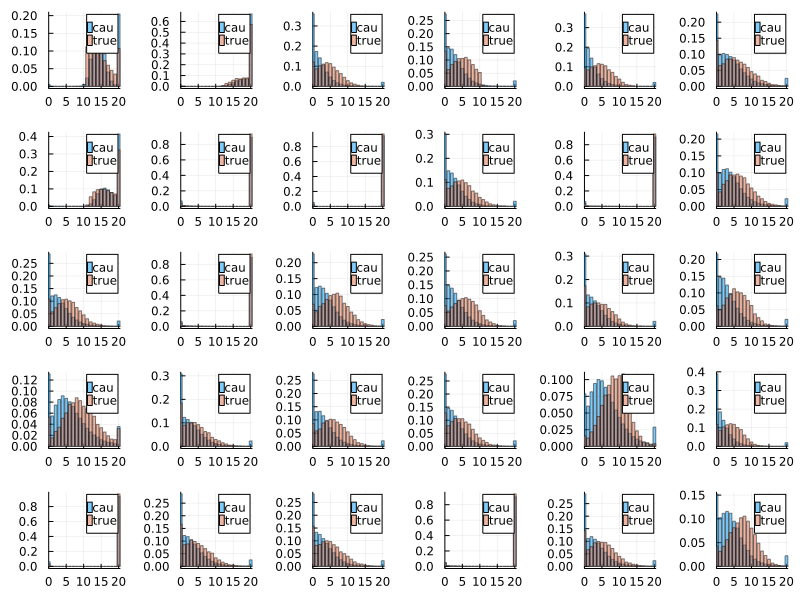

In [49]:
using Plots
pl = map(1:N) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[k,:]), up=M.T), alpha=0.5, legend=true, xlims=(0,M.T+0.5), bins=20, label="cau");
    bar!(p, 0:M.T/20:M.T, histo((@view stats[k,:]), up=M.T),    alpha=0.5, legend=true, xlims=(0,M.T+0.5), bins=20, label="true");
    #histogram!(p, (@view statsp[k,:]), alpha=0.5, legend=true, normalize=true, xlims=(0,T), bins=20, label="Qp");
end;
plot(pl..., size=(800,600))